## DERIVATIVE PRICING
MODULE 4 | LESSON 4


---



# **SIMULATING INTEREST RATES: VASICEK MODEL**


|  |  |
|:---|:---|
|**Reading Time** |  40 minutes |
|**Prior Knowledge** | Black-Scholes, GBM, Simulation  |
|**Keywords** | Vasicek, Interest rates model, Mean-reversion|


---<span style='color: transparent; font-size:1%'>All rights reserved WQU WorldQuant University QQQQ</span>

*In this lesson, we will tackle the use of stochastic differential equations (SDE) for simulating the behavior of other types of assets. Specifically, we will focus on simulating interest rates using the SDE associated with the **Vasicek (1977) model**.*

As always, let's first import some libraries we will need down the road:

In [1]:
import matplotlib.pyplot as plt
import numpy as np

## 1. Vasicek (1977) Model

In Vasicek's model, the risk-neutral process for interest rates is:

$ dr = k(θ-r)dt + \sigma dz$

where $dz = \sqrt{dt} z$, with $z \sim \mathcal{N}(0,1)$. 

Let's build a function for this SDE:

In [2]:
def vasicek(r0, K, theta, sigma, T, N, M):
    dt = T / N
    rates = np.zeros((N, M))
    rates[0, :] = r0
    for j in range(M):
        for i in range(1, N):
            dr = (
                K * (theta - rates[i - 1, j]) * dt
                + sigma * np.sqrt(dt) * np.random.normal()
            )
            rates[i, j] = rates[i - 1, j] + dr
    return rates

Now, we can use the same intuition of the Monte Carlo methods we used before for the Black-Scholes SDE to simulate interest rates given a current level, $r_0$. 

In [3]:
M = 100  # Number of paths for MC
N = 100  # Number of steps
T = 1.0  # Maturity
r0 = 0.01875
K = 0.20
theta = 0.01
sigma = 0.012
t = np.linspace(0, T, N)

rates = vasicek(r0, K, theta, sigma, T, N, M)
rates.shape

(100, 100)

We have just simulated interest rates for 100 paths and 100 steps.

Let's see how these look:

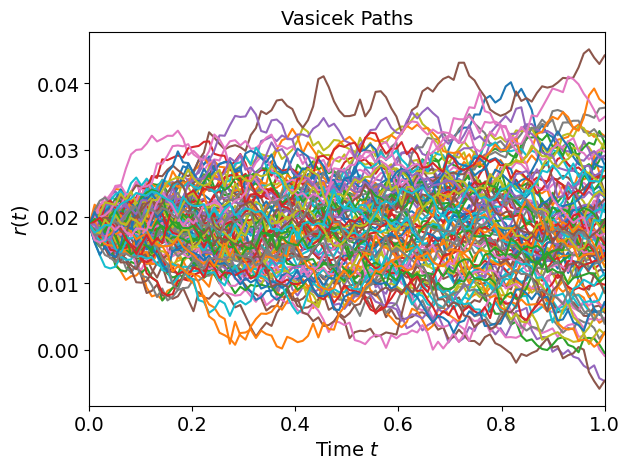

In [4]:
for j in range(M):
    plt.plot(t, rates[:, j])

plt.xlabel("Time $t$", fontsize=14)
plt.ylabel("$r(t)$", fontsize=14)
plt.title("Vasicek Paths", fontsize=14)
axes = plt.gca()
axes.set_xlim([0, T])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.show()

## 2. Conclusion

In this lesson, you have seen even more of the power of Monte Carlo techniques. As long as we have an expression (e.g., an SDE) that models the behavior of the underlying asset, we can apply this technique to all different kinds of assets, not just equities!

In the next module, we will look at how we can adapt the different models (i.e., SDEs) so that they are able to incorporate the different features of stock prices and returns.

---
Copyright 2025 WorldQuant University. This
content is licensed solely for personal use. Redistribution or
publication of this material is strictly prohibited.
